In [1]:
#Imports
import matplotlib.pyplot as plt
from astropy.io import ascii

In [2]:
#Read the data
data = ascii.read('Final_Combined_Data_Accepted.csv')

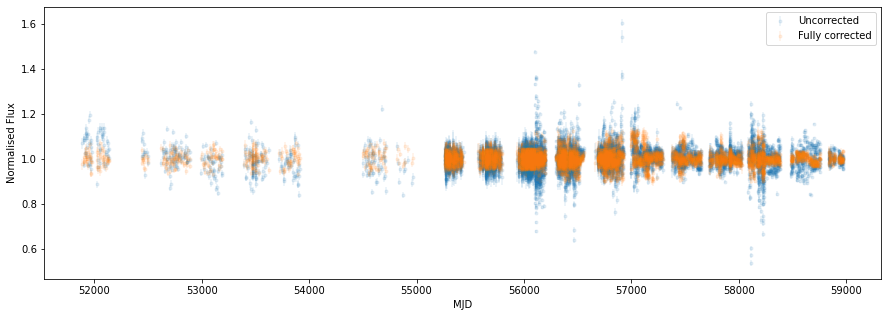

In [3]:
#Plot it up
fig, ax = plt.subplots(1)
ax.errorbar(data['MJD'], data['Non_Corr_Flux'], yerr = data['Eflux'], fmt = '.', alpha = 0.1, label ='Uncorrected')
ax.errorbar(data['MJD'], data['Corr_Flux'], yerr = data['Eflux'], fmt = '.', alpha= 0.1, label = 'Fully corrected')
ax.set_xlabel('MJD')
ax.set_ylabel('Normalised Flux')
ax.legend()
fig.set_size_inches(15, 5)

plt.show()

Checking that CDS table can be read in and plotted out

**NOTE** the CDS reader in astropy does not handle the `telnum` column correctly. The column is correctly specified in the CDS table as a one character array `A1` but the astropy routine reads it in as a `masked` array.

In [10]:
readme = 'ReadMe'
r = ascii.get_reader(ascii.Cds, readme=readme)
data = r.read('j1407.dat')
data

MJD,flux,fluxcorr,fluxerr,telnum
d,,,,
float64,float64,float64,float64,str1
51887.35963,1.0687,0.9757,0.0233,1
51900.34297,1.0846,1.0069,0.0189,1
51903.34678,1.0826,0.9858,0.0193,1
51905.35319,1.0924,0.9861,0.0187,1
51907.34975,0.9722,0.9924,0.0146,1
51914.3018,1.0272,1.0265,0.0193,1
51919.30822,1.0921,1.03,0.0208,1
51921.30735,1.1165,1.0069,0.0186,1


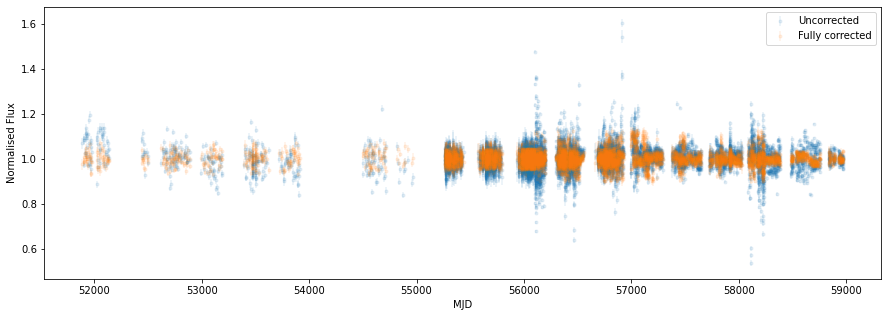

In [11]:
#Plot it up
fig, ax = plt.subplots(1)
ax.errorbar(data['MJD'], data['flux'], yerr = data['fluxerr'], fmt = '.', alpha = 0.1, label ='Uncorrected')
ax.errorbar(data['MJD'], data['fluxcorr'], yerr = data['fluxerr'], fmt = '.', alpha= 0.1, label = 'Fully corrected')
ax.set_xlabel('MJD')
ax.set_ylabel('Normalised Flux')
ax.legend()
fig.set_size_inches(15, 5)

plt.show()

Here we specify the number of the telescope with its name in a `dict`

In [13]:
tele = {"1":"ASAS", "2":"ASAS-SN", "3":"KELT", "4":"PROMPT", "5":"ROAD"}

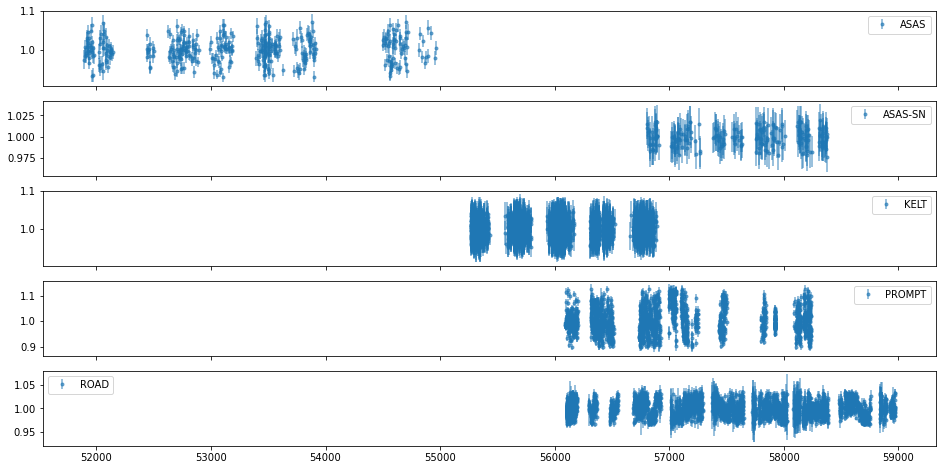

In [27]:
fig, axes = plt.subplots(len(tele),1,figsize=(16,8),sharex=True)

for (t,cax) in zip(tele,axes):
    tsel = data[data['telnum']==t]
    cax.errorbar(tsel['MJD'], tsel['fluxcorr'], yerr = tsel['fluxerr'], fmt = '.', alpha= 0.6, label = tele[t])
    cax.legend()
